In [4]:
# 지도시각화 - GeoPandas 패키지

In [13]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade geopandas


Requirement already up-to-date: geopandas in c:\users\lg\anaconda3\lib\site-packages (0.11.0)
Requirement already up-to-date: pyshp in c:\users\lg\anaconda3\lib\site-packages (2.3.0)
Requirement already up-to-date: shapely in c:\users\lg\anaconda3\lib\site-packages (1.8.2)
Requirement already up-to-date: geopandas in c:\users\lg\anaconda3\lib\site-packages (0.11.0)


In [14]:
!pip install --upgrade contextily

Requirement already up-to-date: contextily in c:\users\lg\anaconda3\lib\site-packages (1.2.0)


In [15]:
from matplotlib import pyplot as plt
# 그래프 한글 표시 
plt.rcParams['font.family'] = 'Gulim'

In [16]:
import geopandas as gpd

In [17]:
import pandas as pd
import numpy as np

In [24]:
import contextily as ctx

ImportError: DLL load failed while importing _base: 지정된 프로시저를 찾을 수 없습니다.

In [25]:
# 타슈 공영자전거 위치 현황
tashu_station=pd.read_csv('data/대전광역시_공영자전거(타슈) 위치(위경도) 현황_20200801.csv',encoding='cp949')

In [26]:
# dataframe을 geodataframe으로 저장
gdf_station = gpd.GeoDataFrame(
    tashu_station, crs = 'epsg:4326',
    geometry = gpd.points_from_xy(
        tashu_station.Longitude,
        tashu_station.Latitude
    )
)

gdf_station.head(1)

,연번,Station 스테이션/성명,위치,Latitude,Longitude,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명,거치대,geometry
0,1,무역전시관입구(택시승강장),대전광역시 유성구 도룡동 3-8,36.374708,127.389027,30,대전광역시,30200,유성구,3020012700,도룡동,3020055000,신성동,14,POINT (127.38903 36.37471)


- 점의 위치, 크기, 색상
- 위치표시 - 점(기본)

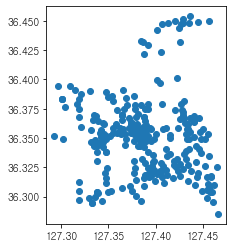

In [21]:
ax = gdf_station.plot()

NameError: name 'ctx' is not defined

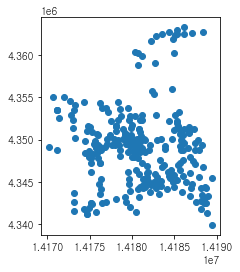

In [22]:
# 위치 표시 - 점 + 지도
ax = gdf_station.to_crs(epsg=3857).plot()
ctx.add_basemap(ax)

In [ ]:
### 시군구 색상 설정
col_levels = {'유성구': "r", '서구':'g','대덕구':'b',
              '중구':'y','동구':'b'}
gdf_station['color'] = [col_levels[i] for i in gdf_station['시군구명']]

In [ ]:
### 위치표시 - 점 + 지도 + 크기 + 색상
gdf_station

In [ ]:
ax = gdf_station.to_crs(epsg = 3857).plot(
    markersize=gdf_station['거치대'] *2,
    color = gdf_station['color'],
    figsize=(6,6)
)

ctx.add_basemap(ax,source = ctx.providers.CartoDB.Positron)
#ax.set_title('대전광역시 타슈 대여소')
ax.set_axis_off()